In [69]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoCV
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
import os
import joblib

from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('src/get_around_pricing_project.csv')
# dropping useless column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 4843

Display of dataset: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basics statistics: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

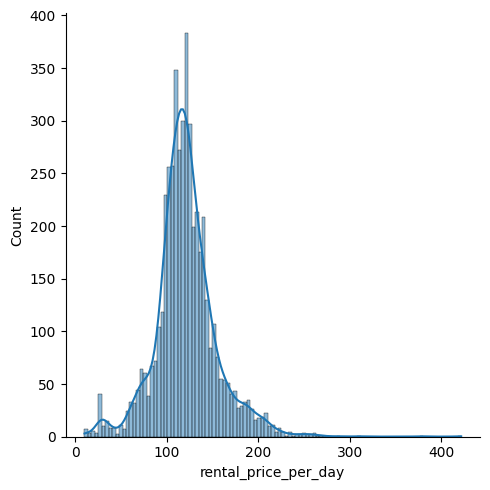

In [5]:
# plot the target
sns.displot(df, x= 'rental_price_per_day', kde=True)

Some outliers must drooped out (negative kilometer or over a million of kilometers), engine power with 0 and rental price per day with values ​​too far, i clean data:

In [6]:
# removing outliers (3 standard deviations away from mean) for mileage, engine power and rental price per day
mask = (df['mileage'] < (df['mileage'].mean() + df['mileage'].std()*3)) & (df['mileage'] > (df['mileage'].mean() - df['mileage'].std()*3))
df_clean = df.loc[mask,:]
mask = (df_clean['engine_power'] < (df_clean['engine_power'].mean() + df_clean['engine_power'].std()*3)) & (df_clean['engine_power'] > (df_clean['engine_power'].mean() - df_clean['engine_power'].std()*3))
df_clean = df_clean.loc[mask,:]
mask = (df_clean['rental_price_per_day'] < (df_clean['rental_price_per_day'].mean() + df_clean['rental_price_per_day'].std()*3)) & (df_clean['rental_price_per_day'] > (df_clean['rental_price_per_day'].mean() - df_clean['rental_price_per_day'].std()*3))
df_clean = df_clean.loc[mask,:]

In [7]:
#checking values after cleaning
print("Basics statistics: ")
data_desc = df_clean.describe(include='all')
display(data_desc)
print()

Basics statistics: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4705,4705.000000,4705.000000,4705,4705,4705,4705,4705,4705,4705,4705,4705,4705,4705.000000
unique,26,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,947,NaN,NaN,4527,1582,1583,2563,3739,3777,3796,2524,3581,4384,NaN
mean,NaN,139583.292030,126.988948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.378959
std,NaN,54251.932208,35.026209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.742222
min,NaN,476.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000
25%,NaN,103683.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,141089.000000,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,174776.000000,135.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.000000


In [8]:
# checking categorical features with non-unique value counts
df_clean['model_key'].value_counts()

Citroën        947
Renault        902
BMW            811
Peugeot        627
Audi           514
Nissan         273
Mitsubishi     217
Mercedes        97
Volkswagen      61
Toyota          45
SEAT            44
PGO             33
Opel            33
Ferrari         32
Subaru          30
Maserati        13
Porsche          6
Ford             5
Alfa Romeo       3
KIA Motors       3
Fiat             2
Lamborghini      2
Suzuki           2
Honda            1
Mazda            1
Yamaha           1
Name: model_key, dtype: int64

In [9]:
# dropping rows with unique value counts
df_clean = df_clean[df_clean['model_key'] != 'Honda']
df_clean = df_clean[df_clean['model_key'] != 'Mazda']
df_clean = df_clean[df_clean['model_key'] != 'Yamaha']

In [10]:
# checking again
df_clean['model_key'].value_counts()

Citroën        947
Renault        902
BMW            811
Peugeot        627
Audi           514
Nissan         273
Mitsubishi     217
Mercedes        97
Volkswagen      61
Toyota          45
SEAT            44
Opel            33
PGO             33
Ferrari         32
Subaru          30
Maserati        13
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Lamborghini      2
Fiat             2
Suzuki           2
Name: model_key, dtype: int64

In [11]:
df_clean['paint_color'].value_counts()

black     1582
grey      1135
blue       689
white      525
brown      340
silver     317
red         50
beige       41
green       17
orange       6
Name: paint_color, dtype: int64

In [12]:
df_clean['car_type'].value_counts()

estate         1583
sedan          1122
suv            1010
hatchback       691
subcompact      115
coupe            94
convertible      44
van              43
Name: car_type, dtype: int64

In [13]:
# checking data after cleaning
print(f'percentage of keeping data after cleaning {round(len(df_clean)/len(df)*100,2)}%')

percentage of keeping data after cleaning 97.09%


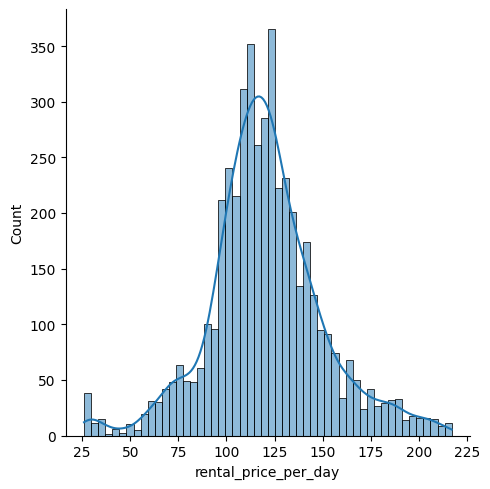

In [14]:
#plot the target after cleaning
sns.displot(df_clean, x= 'rental_price_per_day', kde=True)

ML

In [17]:
df_clean.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [18]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires']
                
target_variable = 'rental_price_per_day'

X = df_clean.loc[:,features_list]
Y = df_clean.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
2    101
3    158
4    183
5    131
Name: rental_price_per_day, dtype: int64

X :
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   
5   Citroën   152352           225  petrol       black  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True                 False          False   
5                       True     True     

In [19]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


C:\Users\dunca\AppData\Local\Temp\ipykernel_12588\2249989688.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,t in X.dtypes.iteritems():


In [20]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [22]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [21]:
categorical_transformer = Pipeline(
    steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [23]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [24]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
     model_key  mileage  engine_power    fuel paint_color car_type  \
1187   Peugeot   148894           100  diesel       black   estate   
4750       BMW   113613           110  diesel        grey      suv   
861       Audi   197468           120  diesel        blue   estate   
3948       BMW   175174           140  diesel        grey      suv   
1392      Audi   133061           160  diesel       black   estate   

      private_parking_available  has_gps  has_air_conditioning  automatic_car  \
1187                       True     True                 False          False   
4750                       True     True                  True           True   
861                        True    False                 False          False   
3948                       True     True                 False           True   
1392                       True     True                  True           True   

      has_getaround_connect  has_speed_regulator  

In [54]:
# The best and last model was XGBoostRegressor (these hyperparameters were fine tuned after a gridsearch)



# Below, this is the whole list of models we've compared 

ada_regressor = AdaBoostRegressor()    
extra_trees_reg = ExtraTreesRegressor()     
random_for_reg = RandomForestRegressor()
grad_boost_reg = GradientBoostingRegressor()
voting = VotingRegressor([('extra', extra_trees_reg), ('rfr', random_for_reg)])
bagg_reg = BaggingRegressor()
xgboostreg = XGBRegressor()
stack = StackingRegressor([('extra', extra_trees_reg), ('rfr', random_for_reg)])
kn = KNeighborsRegressor()
ridge_cv = RidgeCV()
sgdreg = SGDRegressor()
lassocv = LassoCV()
linearsvr = LinearSVR()
svr = SVR()
linear = LinearRegression()


list_models = [
    ada_regressor,
    extra_trees_reg, 
    random_for_reg,
    grad_boost_reg, 
    voting, 
    xgboostreg,
    bagg_reg, 
    stack, 
    kn,
    ridge_cv,
    sgdreg,
    lassocv,
    linearsvr,
    svr,
    linear,
    

    ]

In [55]:
scores_df = pd.DataFrame(columns = ['model', 'r2_score_train', 'r2_score_test'], index=[0])
scores_df.index = scores_df.index + 1

for model in list_models:
    model = model
    name_model = str(model.__class__).split(".")[-1][:-2]
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print()
    print(f"R2 score de {name_model} on training set : ", r2_score(Y_train, Y_train_pred))
    print(f"R2 score de {name_model} on test set : ", r2_score(Y_test, Y_test_pred))
    Nscore_df = pd.Series({'model' : name_model, 'r2_score_train': r2_score(Y_train, Y_train_pred), 'r2_score_test': r2_score(Y_test, Y_test_pred)})
    scores_df = pd.concat([scores_df, Nscore_df.to_frame().T], ignore_index=True)
    


scores_df = scores_df.sort_values(by='r2_score_test', ascending=False)
scores_df.head(10)


R2 score de AdaBoostRegressor on training set :  0.44242365549966367
R2 score de AdaBoostRegressor on test set :  0.406781755912483

R2 score de ExtraTreesRegressor on training set :  0.9999971945047453
R2 score de ExtraTreesRegressor on test set :  0.7370578497986582

R2 score de RandomForestRegressor on training set :  0.964695914006232
R2 score de RandomForestRegressor on test set :  0.7441089446137901

R2 score de GradientBoostingRegressor on training set :  0.774628912079556
R2 score de GradientBoostingRegressor on test set :  0.728515865752645

R2 score de VotingRegressor on training set :  0.9913144318416128
R2 score de VotingRegressor on test set :  0.7498595017981372

R2 score de XGBRegressor on training set :  0.939350569143895
R2 score de XGBRegressor on test set :  0.7647720696836244

R2 score de BaggingRegressor on training set :  0.9511017067963553
R2 score de BaggingRegressor on test set :  0.7193935795459812

R2 score de StackingRegressor on training set :  0.982269107

,model,r2_score_train,r2_score_test
6,XGBRegressor,0.939351,0.764772
5,VotingRegressor,0.991314,0.74986
8,StackingRegressor,0.982269,0.749015
3,RandomForestRegressor,0.964696,0.744109
2,ExtraTreesRegressor,0.999997,0.737058
4,GradientBoostingRegressor,0.774629,0.728516
7,BaggingRegressor,0.951102,0.719394
15,LinearRegression,0.712087,0.695133
10,RidgeCV,0.712063,0.694993
12,LassoCV,0.70919,0.690788


In [64]:
scores_df.to_csv('src/scores_by_model.csv', index=False)
df_clean.to_csv('src/pricing_clean.csv', index=False)

In [63]:
# Perform grid search to find best hyperparameter

print("Grid search...")
regressor = XGBRegressor()
# Grid of values to be tested
param_grid = {
    'max_depth' : [ 3, 4, 5, 6, 8],
    'learning_rate': [0.05, 0.10, 0.15, 0.3, 0.5],
    'n_estimators': [50, 100, 150, 200],
    'reg_alpha' : [0, 1, 2, 3],
    'reg_lambda' : [1, 2, 3],
        
}
gridsearch = GridSearchCV(regressor, param_grid, cv = 10, verbose=2) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_lambda=1; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, reg_alpha=0, reg_la

In [65]:
# Train model
print("Train model...")
regressor = XGBRegressor(learning_rate=0.1, max_depth=6, n_estimators=200, reg_alpha=2, reg_lambda= 1)
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [66]:
# predict
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

In [67]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9165513103830398
R2 score on test set :  0.7821187450447505


Saving model and create a pipeline with preprocessor and model

In [70]:
pipe = make_pipeline(preprocessor, regressor)
pipe.fit(X,Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['mileage', 'engine_power']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['model_key', 'fuel',
                                                   'paint_color', 'car_type',
                                                   'private_parking_available',
                                                   'has_gps',
                                                   'has_air_conditioning',
                                                   'automatic_car',
                                                   'has_getaroun...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_bin=256, max_cat_threshold=64,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=200, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, ...))])

In [71]:
# save our joblib file
joblib.dump(pipe, 'api/xgboost_r.joblib')

['api/xgboost_r.joblib']